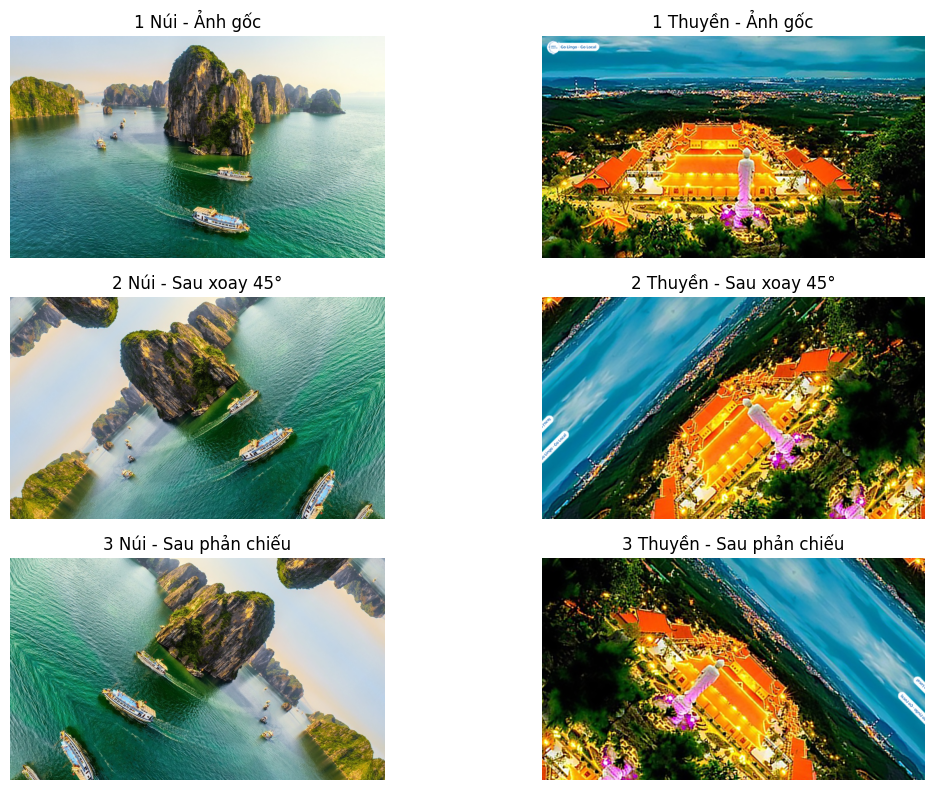

In [4]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

# Đọc ảnh núi và thuyền
mountain = iio.imread("exercise/quang_ninh.jpg")
boat = iio.imread("exercise/pagoda.jpg")  # giả sử là ảnh có thuyền

# Hàm xoay và phản chiếu ảnh theo chiều dọc
def rotate_and_mirror(img, angle=45):
    # Xoay 45 độ, không thay đổi kích thước (reshape=False)
    rotated = rotate(img, angle=angle, reshape=False, mode='reflect')
    # Phản chiếu dọc (ngược từ trái sang phải)
    mirrored = np.fliplr(rotated)
    return mirrored

# Áp dụng cho cả hai ảnh
mountain_transformed = rotate_and_mirror(mountain)
boat_transformed = rotate_and_mirror(boat)

# Kích thước canvas trắng đủ lớn để chứa 2 ảnh
h1, w1 = mountain_transformed.shape[:2]
h2, w2 = boat_transformed.shape[:2]
canvas_h = max(h1, h2)
canvas_w = w1 + w2 + 50  # chừa khoảng cách giữa 2 ảnh

# Tạo canvas trắng (RGB 255)
canvas = np.ones((canvas_h, canvas_w, 3), dtype=np.uint8) * 255

# Ghép ảnh núi bên trái
canvas[0:h1, 0:w1] = mountain_transformed

# Ghép ảnh thuyền bên phải
canvas[0:h2, w1+50:w1+50+w2] = boat_transformed

# Lưu kết quả
iio.imsave("exercise/mountain_boat_mirror.jpg", canvas)

# Hiển thị các bước xử lý từng ảnh
plt.figure(figsize=(12, 8))

# Ảnh gốc núi
plt.subplot(3, 2, 1)
plt.imshow(mountain)
plt.title("1️ Núi - Ảnh gốc")
plt.axis('off')

# Núi xoay 45 độ
rot_mountain = rotate(mountain, angle=45, reshape=False, mode='reflect')
plt.subplot(3, 2, 3)
plt.imshow(rot_mountain)
plt.title("2️ Núi - Sau xoay 45°")
plt.axis('off')

# Núi sau phản chiếu
plt.subplot(3, 2, 5)
plt.imshow(mountain_transformed)
plt.title("3️ Núi - Sau phản chiếu")
plt.axis('off')

# Ảnh gốc thuyền
plt.subplot(3, 2, 2)
plt.imshow(boat)
plt.title("1️ Thuyền - Ảnh gốc")
plt.axis('off')

# Thuyền xoay 45 độ
rot_boat = rotate(boat, angle=45, reshape=False, mode='reflect')
plt.subplot(3, 2, 4)
plt.imshow(rot_boat)
plt.title("2️ Thuyền - Sau xoay 45°")
plt.axis('off')

# Thuyền sau phản chiếu
plt.subplot(3, 2, 6)
plt.imshow(boat_transformed)
plt.title("3️ Thuyền - Sau phản chiếu")
plt.axis('off')

plt.tight_layout()
plt.show()
